In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def kf(zz, x0, P0, F, G, Q, R):
    ''' Kalman Filter
        Inputs:
            zz: 1d numpy array of measurements
            x0: initial state estimate vector (N, 1) numpy array
            P0: initial error covariance matrix (N, N) numpy array
            F: state propagation matrix (N, N) numpy array
            G: measurement matrix (1, M) numpy array
            Q: covariance of the process noise (N, N) numpy array
            R: covariance of the measurement noise (1, M) numpy array
        Outputs:
            x_hist: estimated states at each time step k
            P_hist: error covariance at each time step k
    '''
    N = F.shape[0]
    M = G.shape[1]
    I = np.eye(N)
    x_k = x0
    P_k = P0
    x_hist = np.zeros((len(zz), G.shape[1]))
    P_hist = np.zeros((len(zz), N, N))
    for ii in range(len(zz)):
        # predict
        x_k = F.dot(x_k)  # apriori state estimate
        P_k = F.dot(P_k).dot(F.T) + Q  # apriori error covariance 

        # update
        K = P_k.dot(G.T) * np.linalg.inv(G.dot(P_k).dot(G.T) + R)
        x_k = x_k + K.dot(zz[ii] - G.dot(x_k)) # a posteriori state estimate
        I_KG = I - K.dot(G)
        P_k = (I_KG).dot(P_k).dot(I_KG.T) + K.dot(R).dot(K.T)  # a posterirori error covariance

        # store state estimate and error covariance
        x_hist[ii] = x_k.T
        P_hist[ii] = P_k
    return x_hist, P_hist

In [3]:
Fs = 10
T = 1/Fs

F = np.array([[1, T], 
              [0, 1]], dtype=float)
H = np.array([[1, 0]], dtype=float)

Q = np.eye(2) * np.array([1e-2, 1e-4], dtype=float)
R = np.array([[10**2]], dtype=float)

x_k = np.array([[100, 0]], dtype=float).T
P_k = np.eye(2) * np.array([1e2, 1e2], dtype=float)

In [4]:
sim_len_sec = 4
N = Fs * sim_len_sec
tt = np.arange(N)
yy = 3 * np.arange(N)
zz = yy + 10 * np.random.randn(N)

Text(0, 0.5, 'Position')

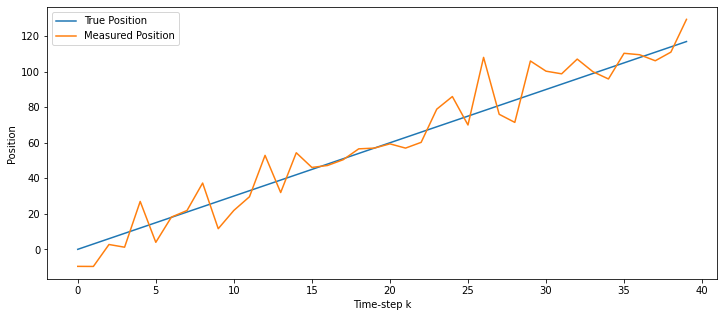

In [5]:
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(111)

ax1.plot(tt, yy, label='True Position')
ax1.plot(tt, zz, label='Measured Position')

ax1.legend()
ax1.set_xlabel('Time-step k')
ax1.set_ylabel('Position')

In [6]:
xx_hat, P_hist = kf(zz, x_k, P_k, F, H, Q, R)

Text(0.5, 1.0, 'Position vs Time')

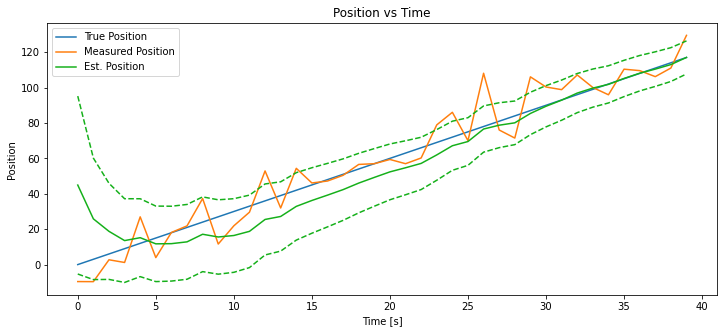

In [7]:
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(111)

ax1.plot(tt, yy, label='True Position')
ax1.plot(tt, zz, label='Measured Position')
ax1.plot(tt, xx_hat[:, 0], color='xkcd:green', label='Est. Position')
ax1.plot(tt, xx_hat[:, 0] + P_hist[:, 0, 0], '--', color='xkcd:green')
ax1.plot(tt, xx_hat[:, 0] - P_hist[:, 0, 0], '--', color='xkcd:green')

ax1.legend()
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Position')
ax1.set_title('Position vs Time')

Text(0.5, 1.0, 'Velocity vs Time')

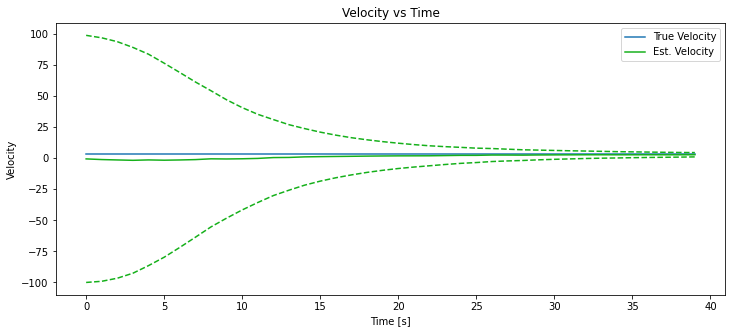

In [8]:
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(111)

ax1.plot(tt, 3 * np.ones(N), label='True Velocity')
ax1.plot(tt, xx_hat[:, 1] * T, color='xkcd:green', label='Est. Velocity')
ax1.plot(tt, xx_hat[:, 1] * T + P_hist[:, 1, 1], '--', color='xkcd:green')
ax1.plot(tt, xx_hat[:, 1] * T - P_hist[:, 1, 1], '--', color='xkcd:green')

ax1.legend()
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Velocity')
ax1.set_title('Velocity vs Time')